# Practice importing and analyzing a dataset using sklearn
Using a data set with variables from my research, data fabricated from ChatGPT for practice purposes only.
Skills practiced:
- Reading in dataset
- Dealing with missing data (continuous and categorical)
- Running simple linear regression
- Plot the data
- Recoding categorical variables
- Running simple linear regression while controlling for age and gender

In [26]:
# Changing the Current Working Directory
import os
# Change the Current Working Directory
# Specify the new directory path
new_directory = '/Users/mickey.rice/Desktop'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/mickey.rice/Desktop


In [34]:
# Load the CSV File
import pandas as pd
csv_file_path = 'PracticeData.csv'
PracticeData_csv = pd.read_csv(csv_file_path)
print("Practice Data:")
display(PracticeData_csv.head())

Practice Data:


,ID,Accuracy,RT,PHQ9,CESD,DASS,PRMQ1,Confidence,JOL,N300,PP,Age,Sex,Gender,Race,Ethnicity,Handedness
0,1.0,97.0,289.0,10.0,50.0,NaN,15.0,85.0,63.0,351.0,132.0,18.0,Male,Female,Asian,Hispanic or Latino,Right
1,2.0,89.0,344.0,6.0,NaN,11.0,13.0,50.0,95.0,311.0,121.0,27.0,NaN,Non-binary,Black or African American,Hispanic or Latino,Ambidextrous
2,3.0,74.0,278.0,NaN,45.0,25.0,13.0,81.0,82.0,223.0,127.0,26.0,Female,Male,Other,Hispanic or Latino,Ambidextrous
3,4.0,94.0,349.0,14.0,31.0,4.0,13.0,64.0,76.0,262.0,111.0,42.0,NaN,Other,Black or African American,Hispanic or Latino,Right
4,5.0,84.0,269.0,4.0,49.0,15.0,19.0,85.0,75.0,326.0,116.0,31.0,Female,Other,Other,Hispanic or Latino,Left


## Dealing with missing data

In [35]:
import numpy as np
PracticeData_csv.isnull().sum()  # Returns the count of missing values in each column

# Visualize the missing data
## !pip install missingno
# import missingno as msno
## msno.matrix(PracticeData_csv)

ID             0
Accuracy      10
RT            10
PHQ9          10
CESD          10
DASS          10
PRMQ1         10
Confidence    10
JOL           10
N300          10
PP            10
Age           10
Sex           10
Gender        10
Race          10
Ethnicity     10
Handedness    10
dtype: int64

In [36]:
# Fill in the missing data with interpolation for numerical columns
PracticeData_csv['Accuracy'].interpolate(method='linear', inplace=True)
PracticeData_csv['RT'].interpolate(method='linear', inplace=True)
PracticeData_csv['PHQ9'].interpolate(method='linear', inplace=True)
PracticeData_csv['CESD'].interpolate(method='linear', inplace=True)
PracticeData_csv['DASS'].interpolate(method='linear', inplace=True)
PracticeData_csv['PRMQ1'].interpolate(method='linear', inplace=True)
PracticeData_csv['Confidence'].interpolate(method='linear', inplace=True)
PracticeData_csv['JOL'].interpolate(method='linear', inplace=True)
PracticeData_csv['N300'].interpolate(method='linear', inplace=True)
PracticeData_csv['PP'].interpolate(method='linear', inplace=True)
PracticeData_csv['Age'].interpolate(method='linear', inplace=True)

# Fill missing values for gender with unknown
PracticeData_csv['Gender'] = PracticeData_csv['Gender'].fillna('Unknown')

# Check if there are any missing values left
PracticeData_csv.isnull().sum()

## Other options: drop missing data (drop rows)
### PracticeData_csv.dropna(inplace=True)  

PracticeData_csv.isnull().sum() 


ID             0
Accuracy       0
RT             0
PHQ9           0
CESD           0
DASS           1
PRMQ1          0
Confidence     0
JOL            0
N300           0
PP             0
Age            0
Sex           10
Gender         0
Race          10
Ethnicity     10
Handedness    10
dtype: int64

## Regressions

In [5]:
!pip install pandas scikit-learn

In [37]:
# Load packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Regression using sklearn.linear_model, LinearRegression package
### Controlling for nothing

In [38]:
# Run the regression and get the slope and intercept
PHQ9 = PracticeData_csv[['PHQ9']]  
Accuracy = PracticeData_csv['Accuracy']  

# Standardize X
scaler = StandardScaler()
PHQ9_standardized = scaler.fit_transform(PHQ9)

# Create and fit the model using standardized X
model = LinearRegression()
model.fit(PHQ9_standardized, Accuracy)


# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.39181696]
Intercept: 83.92


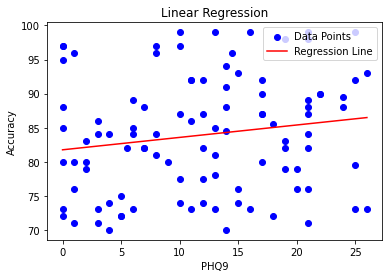

In [39]:
import matplotlib.pyplot as plt

# Plot the data and the regression line
plt.scatter(PHQ9, Accuracy, color='blue', label='Data Points') 

# Transform the standardized X back to the original scale
PHQ9_range = np.linspace(PHQ9.min(), PHQ9.max(), 100).reshape(-1, 1)
PHQ9_range_df = pd.DataFrame(PHQ9_range, columns=['PHQ9']) # Make sure X is always read as a data frame
PHQ9_range_standardized = scaler.transform(PHQ9_range_df)
Accuracy_predicted = model.predict(PHQ9_range_standardized)

plt.plot(PHQ9_range, Accuracy_predicted, color='red', label='Regression Line')  # Plotting the regression line

# Adding labels and title
plt.xlabel('PHQ9')
plt.ylabel('Accuracy')
plt.title('Linear Regression')
plt.legend()

# Display the plot
plt.show()

### Controlling for age and gender

In [40]:
# Code categorical variable (Gender) using one-hot encoding

# Recode 'non-binary' to 'other'
PracticeData_csv['Gender'] = PracticeData_csv['Gender'].replace('Non-binary', 'Other')

# One-hot encode the gender variable
PracticeData_csv = pd.get_dummies(PracticeData_csv, columns=['Gender'], drop_first=True)

# Display the first few rows to see the changes
PracticeData_csv.head()

,ID,Accuracy,RT,PHQ9,CESD,DASS,PRMQ1,Confidence,JOL,N300,PP,Age,Sex,Race,Ethnicity,Handedness,Gender_Male,Gender_Other,Gender_Unknown
0,1.0,97.0,289.0,10.0,50.0,NaN,15.0,85.0,63.0,351.0,132.0,18.0,Male,Asian,Hispanic or Latino,Right,0,0,0
1,2.0,89.0,344.0,6.0,47.5,11.0,13.0,50.0,95.0,311.0,121.0,27.0,NaN,Black or African American,Hispanic or Latino,Ambidextrous,0,1,0
2,3.0,74.0,278.0,10.0,45.0,25.0,13.0,81.0,82.0,223.0,127.0,26.0,Female,Other,Hispanic or Latino,Ambidextrous,1,0,0
3,4.0,94.0,349.0,14.0,31.0,4.0,13.0,64.0,76.0,262.0,111.0,42.0,NaN,Black or African American,Hispanic or Latino,Right,0,1,0
4,5.0,84.0,269.0,4.0,49.0,15.0,19.0,85.0,75.0,326.0,116.0,31.0,Female,Other,Hispanic or Latino,Left,0,1,0


In [41]:
# Scale the appropriate variables (PHQ9 and age)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the age and PHQ9 variables
PracticeData_csv[['Age', 'PHQ9']] = scaler.fit_transform(PracticeData_csv[['Age', 'PHQ9']])

# Display the first few rows to see the changes
PracticeData_csv.head()


,ID,Accuracy,RT,PHQ9,CESD,DASS,PRMQ1,Confidence,JOL,N300,PP,Age,Sex,Race,Ethnicity,Handedness,Gender_Male,Gender_Other,Gender_Unknown
0,1.0,97.0,289.0,-0.249664,50.0,NaN,15.0,85.0,63.0,351.0,132.0,-1.703599,Male,Asian,Hispanic or Latino,Right,0,0,0
1,2.0,89.0,344.0,-0.772520,47.5,11.0,13.0,50.0,95.0,311.0,121.0,-0.990133,NaN,Black or African American,Hispanic or Latino,Ambidextrous,0,1,0
2,3.0,74.0,278.0,-0.249664,45.0,25.0,13.0,81.0,82.0,223.0,127.0,-1.069407,Female,Other,Hispanic or Latino,Ambidextrous,1,0,0
3,4.0,94.0,349.0,0.273192,31.0,4.0,13.0,64.0,76.0,262.0,111.0,0.198978,NaN,Black or African American,Hispanic or Latino,Right,0,1,0
4,5.0,84.0,269.0,-1.033948,49.0,15.0,19.0,85.0,75.0,326.0,116.0,-0.673037,Female,Other,Hispanic or Latino,Left,0,1,0


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the predictor (PHQ9) and dependent variables (Accuracy)
# Include the covariates: age and gender categories. Female is the comparison point
X = PracticeData_csv[['PHQ9', 'Age', 'Gender_Male', 'Gender_Other', 'Gender_Unknown']]
y = PracticeData_csv['Accuracy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 49.426078394414674
Coefficients: [ 1.02584615 -0.51016312 -0.31297955 -0.78914396  1.36370215]
Intercept: 84.02008523042139


#### Final notes:
sklearn.linear_model and statsmodel will give slightly different outputs! 
#### Important differences: 
- Each library handles the linear regression fitting process differently and uses different default settings.
- Statsmodels uses Ordinary Least Squares (OLS), which computes coefficients using matrix operations directly.
- Scikit-learn may use iterative methods  to optimize coefficients, which can lead to slightly different results especially for large datasets or models with complex structures.
#### Other considerations: 
There are lots of options in addressing missing data (i.e., imputing with the mean or mode, predicting the value with modeling, dropping the row, creating an unknown category, etc.). Try to pick the option that makes the most sense for the particular dataset and type of missing data.  )